### Feature Engineering Lab
#### Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

#### Check for null values in the numerical columns.


#### Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sklearn
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 20) #when calculating for null percentages, not all output is show unless this code is executed
warnings.filterwarnings("ignore")

#### Libraries for imputing null values

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer #to bypass the import error
from sklearn.impute import IterativeImputer

In [5]:
data= pd.read_csv('learningSet.csv')

In [6]:
data.sample(5)

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,...,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
53443,8601,LKE,1,WI,54740,...,X,X,X,56.0,D
18504,9301,BLI,1,IL,60445,...,X,X,X,21.0,A
63911,9601,WIG,0,NV,89128,...,X,X,X,13.0,B
19671,9101,AML,2,TX,77036,...,X,X,X,9.0,A
21661,8901,FCR,2,MO,64113,...,X,X,X,7.0,B


In [7]:
data.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,...,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,...,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,...,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,...,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,...,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,...,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,...,1.000000,200.000000,1.000000,4.000000,62.000000


In [8]:
numerical_columns= data.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)
                                               

Index(['ODATEDW', 'TCODE', 'DOB', 'AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'HIT',
       'MBCRAFT', 'MBGARDEN',
       ...
       'FISTDATE', 'NEXTDATE', 'TIMELAG', 'AVGGIFT', 'CONTROLN', 'TARGET_B',
       'TARGET_D', 'HPHONE_D', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=407)


In [9]:
null_counts = data[numerical_columns].isnull().sum()
print(null_counts)
                                                                                                                                             

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 407, dtype: int64


In [10]:
numerical_nulls = pd.DataFrame(data.select_dtypes(np.number).isna().sum()*100/len(data), columns=["percentage"])
numerical_nulls[numerical_nulls["percentage"]>0].sort_values("percentage", ascending=False)

,percentage
RDATE_5,99.990567
RAMNT_5,99.990567
RAMNT_3,99.746363
RDATE_3,99.746363
RDATE_4,99.705488
...,...
ADATE_3,2.043768
MSA,0.138347
ADI,0.138347
DMA,0.138347


#### What stands out is that RDATE, RAMNT and ADATE variables have unusually high proportions of nulls. RDATE and RAMNT are the gift dates and gift amounts respectively, so it can be construed that if no donation was made by the recipient, no entries would be made into those columns. Therefore, it stands to assume that these NANs probably indicate non-donations (0).

In [11]:
for column in data.columns:
    if column.startswith("RAMNT"):
        data[column]= data[column].fillna(0)

In [12]:
numerical_nulls = pd.DataFrame(data.select_dtypes(np.number).isna().sum()*100/len(data), columns=["percentage"])  #to check if nulls in RAMNT have been successfully replaced
numerical_nulls[numerical_nulls["percentage"]>0].sort_values("percentage", ascending=False)

,percentage
RDATE_5,99.990567
RDATE_3,99.746363
RDATE_4,99.705488
RDATE_6,99.186685
RDATE_15,92.388798
...,...
ADATE_3,2.043768
MSA,0.138347
ADI,0.138347
DMA,0.138347


In [13]:
#### As per our previous activities, we were instructed to remove ADATE & RDATE. And lo and behold!

In [14]:
dropped_columns=[]  #making a list to store all the dropped columns

In [15]:
for column in data.columns:
    if column.startswith("ADATE"):
        dropped_columns.append(column)
        data= data.drop(column, axis=1)

In [16]:
has_adate_columns = any(col.startswith("ADATE") for col in data.columns) #checking if the columns were really dropped
print("DataFrame still has ADATE columns" if has_adate_columns else "DataFrame does not have ADATE columns")

DataFrame does not have ADATE columns


In [17]:
for column in data.columns:
    if column.startswith("RDATE"):
        dropped_columns.append(column)
        data= data.drop(column, axis=1)

In [18]:
has_rdate_columns = any(col.startswith("RDATE") for col in data.columns) #checking if the columns were really dropped
print("DataFrame still has RDATE columns" if has_rdate_columns else "DataFrame does not have RDATE columns")

DataFrame does not have RDATE columns


In [19]:
numerical_nulls = pd.DataFrame(data.select_dtypes(np.number).isna().sum()*100/len(data), columns=["percentage"])  #to check if nulls in RAMNT have been successfully replaced
numerical_nulls[numerical_nulls["percentage"]>0].sort_values("percentage", ascending=False)

,percentage
NUMCHLD,87.018404
MBCOLECT,55.458433
PUBCULIN,55.395548
MAGFEM,55.395548
PUBNEWFN,55.395548
...,...
TIMELAG,10.452564
MSA,0.138347
ADI,0.138347
DMA,0.138347


#### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [20]:
#### As the case study requires us to classify respondents as donors or non donors, the nulls must be eliminated for the eventual logistic regression to run.

In [21]:
lab_columns=['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']

In [22]:
#Apart from WEALTH1, every other variable seems to have the same number of nulls. This could indicate the same number of rows, so let's look into that. later discoveries in the EDA section seems to reinforce the idea that GEOCODE2, ADI, DMA and MSA are all related to each other, in the sense that they are all geographical codes.

In [23]:
null_counts = data[lab_columns].isnull().sum()
print("Null value counts for each column:")
print(null_counts)

Null value counts for each column:
GEOCODE2      132
WEALTH1     44732
ADI           132
DMA           132
MSA           132
dtype: int64


In [24]:
lab_columns_description= data[lab_columns].describe() #Additional EDA
print(lab_columns_description)

            WEALTH1           ADI           DMA           MSA
count  50680.000000  95280.000000  95280.000000  95280.000000
mean       5.345699    187.356402    664.004072   3527.744102
std        2.742490    137.019184    116.363600   2863.904737
min        0.000000      0.000000      0.000000      0.000000
25%        3.000000     65.000000    561.000000    520.000000
50%        6.000000    175.000000    635.000000   3350.000000
75%        8.000000    279.000000    801.000000   5960.000000
max        9.000000    651.000000    881.000000   9360.000000


In [25]:
for column in lab_columns:  #Some more additional EDA
    column_values = data[column].value_counts(dropna=False)
    print(f"Value counts for '{column}':")
    print(column_values)
    print()


Value counts for 'GEOCODE2':
A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64

Value counts for 'WEALTH1':
NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

Value counts for 'ADI':
13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

Value counts for 'DMA':
803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

Value counts for 'MSA':
0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: 

#### Now, let's check if the same rows across all the listed variables are afflicted with nulls, first with and then without 'WEALTH1'

In [26]:
null_check = data['GEOCODE2'].isnull() & data['ADI'].isnull() & data['DMA'].isnull() & data['MSA'].isnull()& data['WEALTH1'].isnull()
rows_with_nulls = null_check.sum()
print(f"Number of rows with nulls in all columns: {rows_with_nulls}")

Number of rows with nulls in all columns: 100


In [27]:
null_check = data['GEOCODE2'].isnull() & data['ADI'].isnull() & data['DMA'].isnull() & data['MSA'].isnull()
rows_with_nulls = null_check.sum()
print(f"Number of rows with nulls in all columns: {rows_with_nulls}") 

Number of rows with nulls in all columns: 132


#### Yes they are, and from this alone we can construe that the same rows in the variables are problematic. Hence the best course of option would be to drop those rows before moving forward with dealing the remaining nulls in WEALTH1 

In [28]:
data.dropna(subset=['GEOCODE2', 'ADI', 'DMA', 'MSA'], inplace=True) #with inplace=true, changes will be made directly to the dataframe

In [29]:
null_counts2 = data[lab_columns].isnull().sum()
print("Null value counts after dropping rows:")
print(null_counts2) #rows that had nulls smimutaneously across all 5 variables were dropped, leaving the bulk of WEALTH1 nulls to be dealt with separately

Null value counts after dropping rows:
GEOCODE2        0
WEALTH1     44632
ADI             0
DMA             0
MSA             0
dtype: int64


In [30]:
### Cleaning 'WEALTH1'

In [31]:
total_values = data['WEALTH1'].value_counts(dropna=False).sum()
print(total_values)

95280


In [32]:
wealth1_null_proportion = (data['WEALTH1'].isnull().sum() / len(data['WEALTH1'])) * 100
print(f"Proportion of nulls in 'WEALTH1': {wealth1_null_proportion:.2f}%") #rounded to two decimal places

Proportion of nulls in 'WEALTH1': 46.84%


In [33]:
wealth1_describe= data['WEALTH1'].value_counts(dropna=False) #just to reconfirm the number of remaining nulls
print(wealth1_describe)

NaN    44632
9.0     7580
8.0     6785
7.0     6196
6.0     5823
5.0     5277
4.0     4808
3.0     4233
2.0     4083
1.0     3452
0.0     2411
Name: WEALTH1, dtype: int64


In [34]:
#### My first instinct would be to drop WEALTH1 as a variable, but the case study file as well as instructions from our previous activities have indicated that WEALTH1 is important. The other option would be to replace the nulls with the mode, but the mode is of the variable is 9.0, which is the highest point on the scale. Doing so would introduce bias into the variable due to its significant proportion. So I've decided to use sklearn's experimental IterativeImputer to impute the missing values!

In [35]:
imputation_model = RandomForestRegressor()

In [36]:
imputer = IterativeImputer(estimator=imputation_model)

In [37]:
data['WEALTH1'] = imputer.fit_transform(data[['WEALTH1']])

In [38]:
wealth1_describe= data['WEALTH1'].value_counts(dropna=False) #just to reconfirm the number of remaining nulls
print(wealth1_describe)

5.345601    44632
9.000000     7580
8.000000     6785
7.000000     6196
6.000000     5823
5.000000     5277
4.000000     4808
3.000000     4233
2.000000     4083
1.000000     3452
0.000000     2411
Name: WEALTH1, dtype: int64


In [39]:
data['WEALTH1'] = np.round(data['WEALTH1']) #because the existing numerical values are discrete in nature

In [40]:
wealth1_describe= data['WEALTH1'].value_counts(dropna=False) #just to reconfirm the number of remaining nulls
print(wealth1_describe)

5.0    49909
9.0     7580
8.0     6785
7.0     6196
6.0     5823
4.0     4808
3.0     4233
2.0     4083
1.0     3452
0.0     2411
Name: WEALTH1, dtype: int64


### EDA

#### The case study documentation provides no explanation as to what ADI, DMA, MSA, and WEALTH1 mean. But after further research, I was able to find out what these abbrevations commonly mean in the context of US, and their implications on further preprocessing:

#### ADI: Area Deprivation Index, a continuous, ordinal variable that measures the level of deprivation/relative poverty in an area. Therefore, ADI should be normalised in the preprocessing stage.

#### WEALTH1: An discrete, ordinal variable that rates and individual's wealth, although the exact definitions for the rating are unknown. It should be handled in the same way ADI would be.

#### DMA: Designated Market Area (geographical code), a discrete nominal variable that has no meaningful numerical scale. Consequently, instead of being normalized or standardzied, the focus should be on encoding the variable.

#### MSA: Metropolitan Statistical Area (geographical code). Ditto above

#### GEOCODE2: Some sort of geographical segmentation code. Ditto above



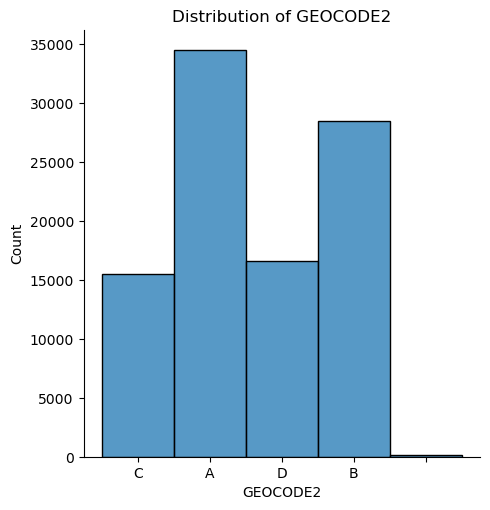

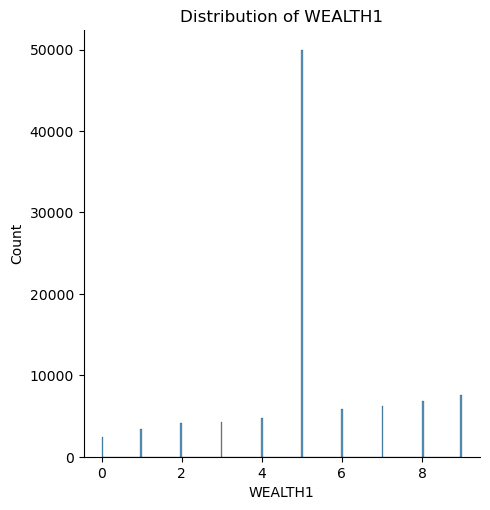

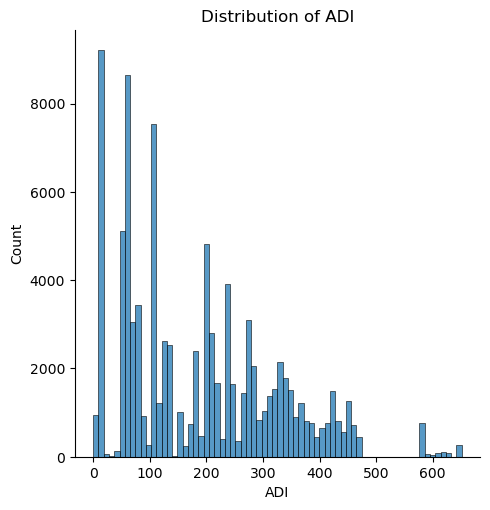

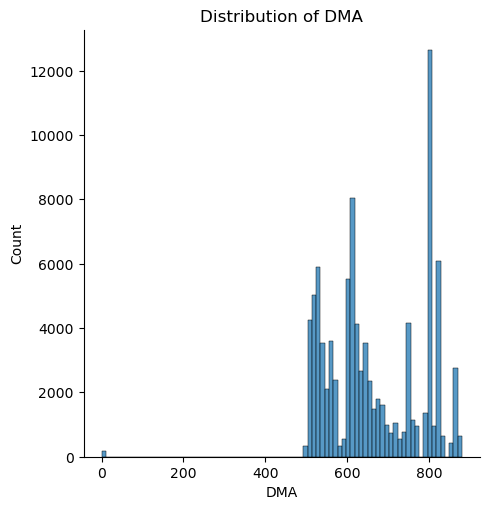

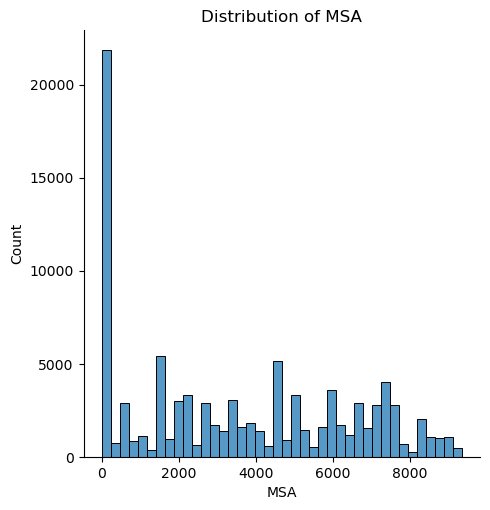

In [41]:
for column in lab_columns:
    sns.displot(data=data, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()